In [1]:
import pandas as pd
import numpy as np


In [2]:
train_DF=pd.read_csv("churn-bigml-80.csv")
test_DF=pd.read_csv("churn-bigml-20.csv")

In [3]:
train_DF.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
test_DF.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [6]:
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [7]:
train_DF=train_DF.drop(columns=["State","Area code"])

In [8]:
test_DF=test_DF.drop(columns=["State","Area code"])

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ["International plan", "Voice mail plan"]:
    train_DF[col]=le.fit_transform(train_DF[col])
    test_DF[col]=le.fit_transform(test_DF[col])



In [10]:
train_DF["Churn"]=le.fit_transform(train_DF["Churn"])
test_DF["Churn"]=le.fit_transform(test_DF["Churn"])

In [11]:
train_DF.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [12]:
x_TRAIN=train_DF.drop(columns="Churn")
y_TRAIN=train_DF["Churn"]

x_TEST=test_DF.drop(columns="Churn")
y_TEST=test_DF["Churn"]

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

rf=RandomForestClassifier()
model=rf.fit(x_TRAIN,y_TRAIN)

y_pred=model.predict(x_TEST)

In [14]:
print("confusion matrix\n",confusion_matrix(y_TEST,y_pred))
print("classfication report",classification_report(y_TEST,y_pred))

confusion matrix
 [[569   3]
 [ 26  69]]
classfication report               precision    recall  f1-score   support

           0       0.96      0.99      0.98       572
           1       0.96      0.73      0.83        95

    accuracy                           0.96       667
   macro avg       0.96      0.86      0.90       667
weighted avg       0.96      0.96      0.95       667



In [15]:
from sklearn.model_selection import GridSearchCV

# Corrected parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],      
    "max_depth": [None, 10, 20, 30],       
    "min_samples_split": [2, 5, 10],      
    "min_samples_leaf": [1, 2, 4],       
    "max_features": ["sqrt", "log2"]   
}

# Initialize baseline model
rf = RandomForestClassifier(random_state=42)

# Grid Search with 5-fold CV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring="f1",
                           verbose=2)

# Fit on training data
grid_search.fit(x_TRAIN, y_TRAIN)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [25]:
# Best parameters from grid search
best_params = grid_search.best_params_

# Train final model with best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
model_b=best_rf.fit(x_TRAIN, y_TRAIN)


In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report


In [27]:
y_pred=model_b.predict(x_TEST)
print("Confusion Matrix:\n", confusion_matrix(y_TEST, y_pred))

print("\nClassification Report:\n", classification_report(y_TEST, y_pred))

print("Accuracy:", accuracy_score(y_TEST, y_pred))

Confusion Matrix:
 [[567   5]
 [ 25  70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       572
           1       0.93      0.74      0.82        95

    accuracy                           0.96       667
   macro avg       0.95      0.86      0.90       667
weighted avg       0.95      0.96      0.95       667

Accuracy: 0.9550224887556222


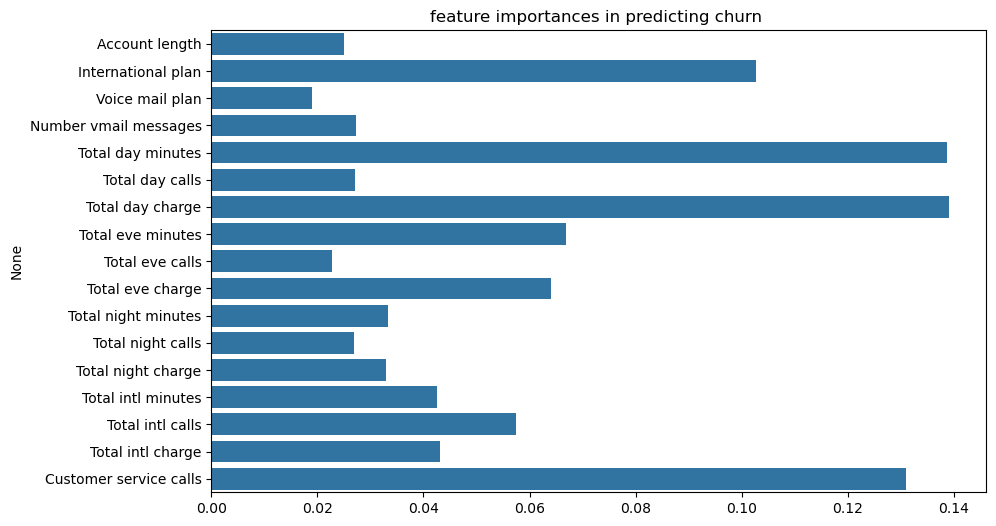

In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns 

feature_imp=model_b.feature_importances_
feature=x_TRAIN.columns

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp,y=feature)
plt.title("feature importances in predicting churn ")
plt.show()

<Axes: >

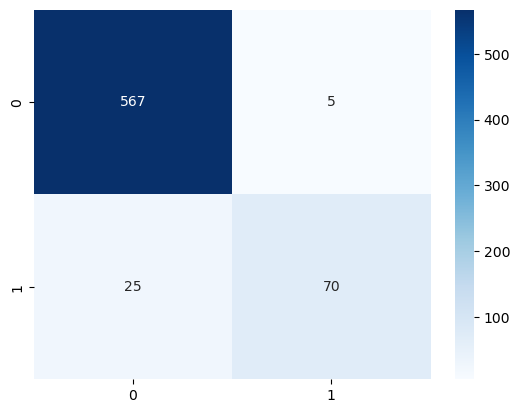

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_TEST, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
